In [1]:
import pandas as pd
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

'wget' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [0]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
 Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
 Label: 0
Patient 2 
 Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
 Label: 0
Patient 3 
 Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
 Label: 0
Patient 4 
 Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
 Label: 1

In [0]:
print(X)

[[0.00000000e+00 1.71000000e+02 8.00000000e+01 ... 4.35097259e+01
 1.21319135e+00 2.10000000e+01]
 [8.00000000e+00 9.20000000e+01 9.30000000e+01 ... 2.12405757e+01
 1.58364981e-01 2.30000000e+01]
 [7.00000000e+00 1.15000000e+02 4.70000000e+01 ... 4.15115235e+01
 7.90185680e-02 2.30000000e+01]
 ...
 [0.00000000e+00 9.30000000e+01 8.90000000e+01 ... 1.86906831e+01
 4.27048955e-01 2.40000000e+01]
 [0.00000000e+00 1.32000000e+02 9.80000000e+01 ... 1.97916451e+01
 3.02257208e-01 2.30000000e+01]
 [3.00000000e+00 1.14000000e+02 6.50000000e+01 ... 3.62154365e+01
 1.47362850e-01 3.40000000e+01]]

/databricks/python/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
 return array(a, dtype, copy=False, order=order)
/databricks/python/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
 return array(a, dtype, copy=False, order=order)
/databricks/python/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
 return array(a, dtype, copy=False, order=order)
/databricks/python/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
 return array(a, dtype, copy=False, order=order)
/databricks/python/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
 return array(a, dtype, copy=False, order=order)
/databricks/python/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
 return array(a, dtype, copy=False, order=order)
/databricks/python/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
 return array(a, dtype, copy=False, order=order)
/databricks/python/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
 return array(a, dtype, copy=False, order=order)

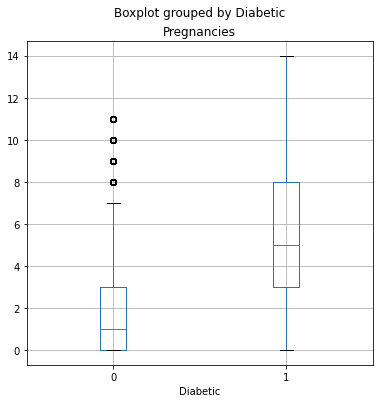

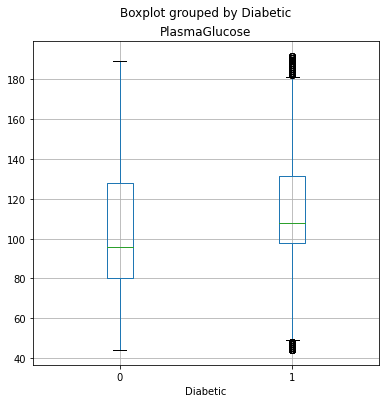

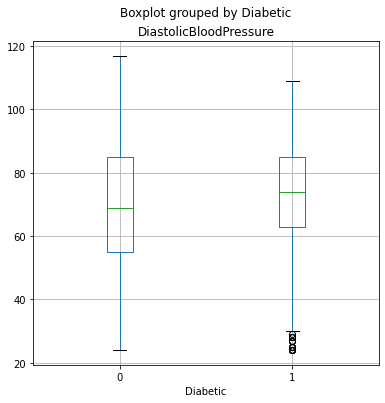

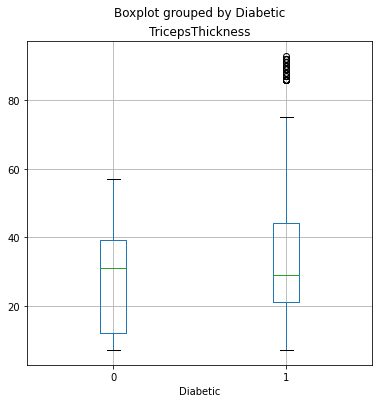

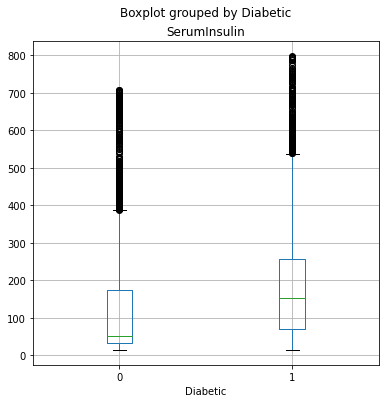

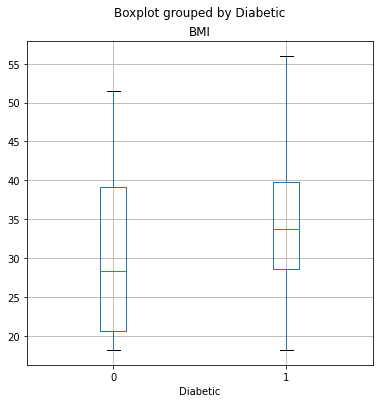

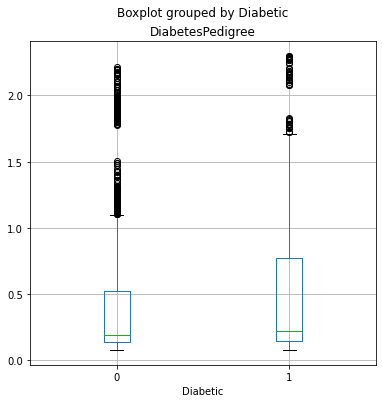

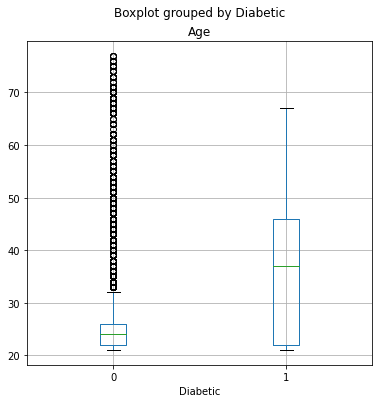

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col,by="Diabetic",figsize=(6,6))
    plt.title(col)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

print("X_train: %d, X_test: %d"% (X_train.shape[0],X_test.shape[0]))

X_train: 10500, X_test: 4500

In [0]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

model = LogisticRegression(C=1/reg,solver="liblinear").fit(X_train,y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')

In [0]:
predictions = model.predict(X_test)
print("predict:",predictions)
print("actual:",y_test)

predict: [0 0 0 ... 0 1 0]
actual: [0 0 1 ... 1 1 1]

In [0]:
# evolution of model

from sklearn.metrics import accuracy_score

print("accuracy:", accuracy_score(y_test,predictions))

accuracy: 0.7893333333333333

In [0]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

precision recall f1-score support

 0 0.81 0.88 0.85 2986
 1 0.72 0.60 0.66 1514

 accuracy 0.79 4500
 macro avg 0.77 0.74 0.75 4500
weighted avg 0.78 0.79 0.78 4500

In [0]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7242472266244057
Overall Recall: 0.6036988110964333

In [0]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638 348]
 [ 600 914]]

[[0.81657749 0.18342251]
 [0.96303915 0.03696085]
 [0.80873957 0.19126043]
 ...
 [0.60693276 0.39306724]
 [0.1065467 0.8934533 ]
 [0.63858497 0.36141503]]

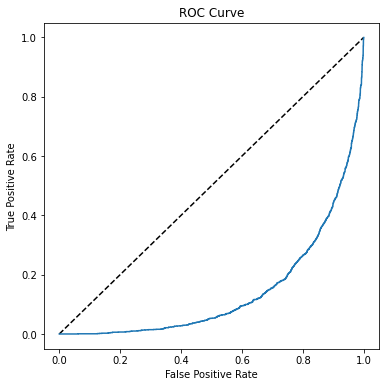

In [0]:
y_scores = model.predict_proba(X_test)
print(y_scores)

from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,0])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))



AUC: 0.8568436056949161

In [0]:
# Use Pipeline to preprocess data transformations.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num',
 Pipeline(steps=[('scaler',
 StandardScaler())]),
 [0, 1, 2, 3, 4, 5, 6]),
 ('cat',
 Pipeline(steps=[('onehot',
 OneHotEncoder(handle_unknown='ignore'))]),
 [7])])),
 ('logregressor',
 LogisticRegression(C=100.0, solver='liblinear'))])

Confusion Matrix:
 [[2667 319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202438327341774

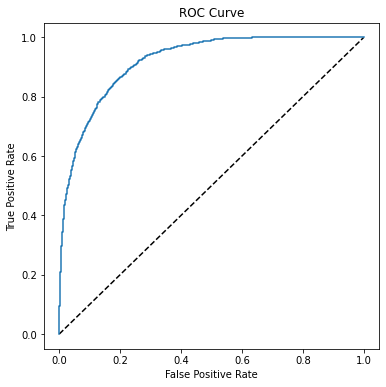

In [0]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Pipeline(steps=[('preprocessor',
 ColumnTransformer(transformers=[('num',
 Pipeline(steps=[('scaler',
 StandardScaler())]),
 [0, 1, 2, 3, 4, 5, 6]),
 ('cat',
 Pipeline(steps=[('onehot',
 OneHotEncoder(handle_unknown='ignore'))]),
 [7])])),
 ('logregressor', RandomForestClassifier())])
Confusion Matrix:
 [[2862 124]
 [ 177 1337]] 

Accuracy: 0.9331111111111111
Overall Precision: 0.9151266255989049
Overall Recall: 0.8830911492734478

AUC: 0.9829489400557955

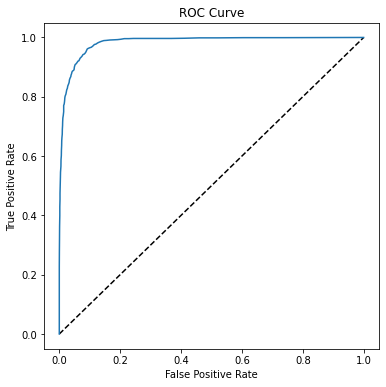

In [0]:
# RandomForestClassifier algorithm using Pipeline

from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[("preprocessor",preprocessor),
                   ("logregressor",RandomForestClassifier(n_estimators=100))])
model = pipeline.fit(X_train,y_train)
print(model)

predictions= model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [0]:
# save prepared model

import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

Out[26]: ['./diabetes_model.pkl']

In [0]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1

In [0]:
############## Thank You ##############################